### purpose

validate RDA offset for complex sims

In [1]:
from pythonimports import *
from myfigs import histo_box, adjust_box_widths

import MVP_03_validate_gradient_forests as mvp03
import MVP_15_climate_outlier_validate_GF as mvp15
import MVP_19_climate_outlier_validate_RDA as mvp19
import MVP_summary_functions as mvp

import seaborn as sns

lview, dview = get_client(cluster_id='1691587352-4f5v', profile='lotterhos')

mvp19.lview = lview

outerdir = '/home/b.lind/offsets/run_20220919_tutorial'
rda_dir = op.join(outerdir, 'rda')
mvp19.offset_dir = op.join(rda_dir, 'offset_outfiles')
validation_dir = makedir(op.join(rda_dir, 'validation'))

mvp.latest_commit()
session_info.show()

36 36
#########################################################
Today:	August 09, 2023 - 13:39:01 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit dcaf4a98ad33a59e3d371eed0bb26b1885505dcf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Sat Jun 24 12:25:29 2023 -0400
#########################################################



# get pop data

In [2]:
inds = pd.read_table(f'{outerdir}/tutorial/My_Individuals.txt')

inds.head()

,ind_index,x,y,phenotype1_mat,phenotype2_MTWetQ,phenotype3_MTDQ,phenotype4_PDM,phenotype5_PwarmQ,phenotype6_PWM,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM,subpopID,lon,lat
0,33,0.406184,0.233272,0.737967,-0.191421,0.142992,-0.131894,-0.452497,-0.541651,0.762432,-0.162238,0.261281,-0.332078,-0.471502,-0.477821,25,5.0,3.0
1,34,0.425697,0.837158,-0.274081,-0.428332,-0.012880,0.221058,0.229296,0.066597,-0.339330,-0.407667,-0.058296,0.288030,0.198810,0.017680,85,5.0,9.0
2,44,0.671673,0.581744,-0.676326,0.086629,-0.470671,0.218813,0.260098,-0.103465,-0.567733,0.090928,-0.414353,0.234899,0.230255,-0.053511,57,7.0,6.0
3,45,0.017466,0.329922,-0.283221,-0.403942,-0.333718,-0.200554,-0.345915,-0.410001,-0.245860,-0.200759,-0.267455,-0.265260,-0.389828,-0.458979,31,1.0,4.0
4,46,0.069744,0.121221,0.057616,-0.303201,0.731600,0.195679,-0.367110,0.196296,-0.121500,-0.306379,0.702858,0.211275,-0.352307,0.212751,11,1.0,2.0


In [3]:
locations = inds.groupby('subpopID')[['lon', 'lat']].apply(np.mean)

locations

,lon,lat
subpopID,,
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0
...,...,...
96,6.0,10.0
97,7.0,10.0
98,8.0,10.0


# read in offsets

In [4]:
outfiles = fs(mvp19.offset_dir, endswith='offset.txt')

assert len(outfiles) == 8  # 4 marker sets (TRUE, FALSE, NEUTRAL, CAUSAL) * 2 (structcorr or nocorr)

In [5]:
offset_dfs = mvp19.read_offset_dfs(outfiles)


Reading in offset dfs ...

Watching 8 jobs ...


100%|███████████████| 8/8 [00:00<00:00, 59178.89it/s]


In [6]:
offset = offset_dfs['tutorial']['pooled']['CAUSAL']['ntraits-6']['nocorr'].copy()

offset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.000000,0.236548,0.888607,1.595533,1.452750,0.937425,0.225795,0.413981,0.526674,1.107130,0.356481,0.538349,1.171868,1.741128,1.251827,0.630125,1.031086,0.954137,1.169316,1.725160,0.934981,0.969093,1.367513,1.810723,0.913628,1.024319,1.241137,1.357745,1.731221,2.191172,1.610359,1.496292,1.749897,1.226852,0.772529,0.999374,1.539597,1.163725,2.241617,2.168413,1.939522,1.810898,1.690865,1.020214,0.845034,1.106057,1.533685,1.397657,2.513491,2.462970,1.941306,1.833495,1.711079,0.865775,0.842213,1.146546,1.435287,2.076053,2.819394,2.612383,1.952728,1.791845,1.167349,1.004522,1.131992,1.316264,2.350175,2.810913,2.852186,2.992092,1.941705,1.765625,1.518299,1.368456,1.250205,1.494205,2.757392,2.923785,2.934890,3.255904,1.903935,1.637472,1.344140,1.560583,1.237019,1.912934,2.736636,2.873582,3.084379,3.304354,1.826445,1.412037,1.275807,1.456256,2.012011,2.420748,2.580973,2.816787,3.311631,3.372082
2,0.236548,0.000000,0.691288,1.449111,1.340960,0.950150,0.388767,0.590671,0.574973,1.167735,0.349480,0.423713,1.053729,1.617710,1.130774,0.639895,1.180083,1.095813,1.242087,1.798206,0.905130,0.875426,1.194341,1.674074,0.775871,1.147276,1.403423,1.481310,1.781292,2.258934,1.596925,1.424262,1.642805,1.142799,0.720778,1.134679,1.694932,1.257590,2.313956,2.223952,1.887689,1.723279,1.613832,0.999527,0.873620,1.235662,1.677991,1.485828,2.591211,2.527821,1.884282,1.759714,1.667954,0.874975,0.905707,1.258732,1.532424,2.164962,2.901886,2.676167,1.909767,1.734754,1.265794,1.108806,1.227778,1.407664,2.433824,2.896482,2.921261,3.047532,1.909116,1.744474,1.585279,1.499725,1.348613,1.562378,2.835778,2.999781,2.997103,3.314727,1.879689,1.657217,1.482400,1.689415,1.324256,1.976057,2.809953,2.939153,3.147714,3.364589,1.792566,1.501570,1.409665,1.565299,2.082981,2.481517,2.634310,2.874944,3.378600,3.434791
3,0.888607,0.691288,0.000000,0.819551,0.821655,0.941404,0.954009,1.159825,0.869067,1.242761,0.713948,0.475585,0.578076,1.034676,0.611616,0.760720,1.510417,1.441884,1.354500,1.814546,0.800183,0.558487,0.519691,1.052154,0.314155,1.404202,1.744621,1.709039,1.724115,2.215703,1.369143,1.020769,1.098762,0.751937,0.613243,1.421919,1.999374,1.419860,2.286910,2.138640,1.492572,1.227328,1.159368,0.867130,0.933965,1.495545,1.946027,1.589380,2.563863,2.451789,1.469958,1.298627,1.305652,0.875795,1.050129,1.468646,1.655636,2.204402,2.875300,2.585753,1.534891,1.324285,1.417496,1.314550,1.398181,1.537835,2.440039,2.884182,2.837364,2.908423,1.563803,1.442547,1.581841,1.737948,1.512076,1.592778,2.799081,2.941524,2.881463,3.176406,1.559937,1.496808,1.739491,1.906794,1.458308,1.941203,2.753912,2.839602,3.026874,3.227534,1.446986,1.591949,1.659004,1.726547,2.062623,2.397442,2.508634,2.744788,3.262167,3.303690
4,1.595533,1.449111,0.819551,0.000000,0.328176,1.122108,1.590483,1.764302,1.360753,1.371134,1.325136,1.087698,0.496094,0.256968,0.392566,1.171705,1.824698,1.791538,1.492838,1.721969,0.977649,0.726387,0.346498,0.245669,0.687346,1.669971,2.026264,1.881964,1.561322,1.986541,1.085480,0.610627,0.375620,0.582044,0.942863,1.711669,2.206590,1.588298,2.070383,1.866784,0.921803,0.554803,0.581459,0.957732,1.186976,1.741743,2.120725,1.648172,2.316474,2.153861,0.873326,0.665255,0.828282,1.103808,1.325885,1.671656,1.720509,2.078570,2.602477,2.256956,0.982317,0.765369,1.569046,1.553659,1.580221,1.640744,2.247034,2.628775,2.496090,2.496356,1.046774,1.015009,1.510390,1.913480,1.658324,1.566908,2.520411,2.624809,2.498189,2.749378,1.079078,1.251068,1.934000,2.032347,1.587386,1.763442,2.454725,2.478777,2.627476,2.798776,0.954346,1.630966,1.860062,1.820518,1.882072,2.096324,2.143566,2.352627,2.854863,2.877901
5,1.452750,1.340960,0.821655,0.328176,0.000000,0.832179,1.407684,1.556957,1.135064,1.059206,1.14746

# read in fitness

In [7]:
mvp15.fitness_dir = '/home/b.lind/offsets/run_20220919_tutorial/tutorial/fitness_mats'
fitness = mvp15.get_fitness(
    ['tutorial'],
)['tutorial']

# fitness['tutorial'].index = fitness['tutorial'].index.astype(int)

# fitness['tutorial'] = fitness['tutorial'].loc[sorted(fitness['tutorial'].index)]

# fitness['tutorial'].index = fitness['tutorial'].index.astype(str)

# fitness['tutorial']

fitness.index = fitness.index.astype(int)

fitness = fitness.loc[sorted(fitness.index)]

fitness.index = fitness.index.astype(str)

fitness


Reading fitness matrices ...


100%|███████████████| 1/1 [00:00<00:00,  2.84it/s]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.982222,0.924615,0.612,0.431,0.500000,0.660000,0.894444,0.878889,0.752667,0.731,0.862857,0.738889,0.49375,0.41500,0.568889,0.790833,0.809091,0.722,0.598182,0.608182,0.6625,0.598333,0.502857,0.422308,0.659167,0.781667,0.77250,0.618889,0.559231,0.532727,0.45625,0.472143,0.438,0.535556,0.705455,0.824286,0.690000,0.65875,0.483,0.526667,0.41750,0.461,0.496667,0.6425,0.732500,0.788571,0.709,0.616667,0.460,0.514286,0.42750,0.483,0.576364,0.723077,0.751818,0.75000,0.641429,0.524286,0.441538,0.483333,0.478462,0.522857,0.73250,0.742727,0.72000,0.666842,0.460,0.38375,0.45500,0.3875,0.48875,0.554000,0.616667,0.680000,0.669375,0.601818,0.410909,0.425714,0.432222,0.377778,0.498571,0.578,0.646,0.633846,0.669,0.529091,0.430,0.454444,0.419333,0.345,0.543333,0.620000,0.650000,0.656667,0.550000,0.483,0.474286,0.483077,0.388571,0.352308
2,0.965556,0.978462,0.748,0.576,0.641429,0.779167,0.906667,0.923333,0.863333,0.842,0.937143,0.868889,0.64625,0.55500,0.705556,0.859167,0.812727,0.780,0.715455,0.700000,0.8000,0.750000,0.648571,0.543077,0.779167,0.818333,0.75125,0.692222,0.667692,0.622727,0.59500,0.617143,0.569,0.678889,0.817273,0.834286,0.685833,0.74250,0.576,0.618889,0.55250,0.588,0.618889,0.7750,0.830000,0.815714,0.736,0.712000,0.542,0.592857,0.55125,0.601,0.679091,0.826154,0.840909,0.82000,0.714286,0.611429,0.520000,0.548889,0.606154,0.634286,0.78625,0.796364,0.79875,0.768947,0.547,0.46125,0.51625,0.4350,0.60625,0.653333,0.674667,0.730000,0.767500,0.710909,0.490909,0.491429,0.481111,0.420000,0.614286,0.662,0.685,0.703077,0.773,0.628182,0.511,0.511111,0.450667,0.377,0.655556,0.685789,0.696667,0.731111,0.640000,0.566,0.548571,0.520000,0.411429,0.379231
3,0.730000,0.825385,0.890,0.871,0.882857,0.874167,0.692222,0.695556,0.810667,0.789,0.827143,0.908889,0.92000,0.84000,0.912222,0.830833,0.642727,0.654,0.761818,0.700000,0.9200,0.952500,0.921429,0.803077,0.920000,0.691667,0.55250,0.637778,0.755385,0.656364,0.81250,0.874286,0.846,0.903333,0.891818,0.674286,0.520833,0.73250,0.642,0.685556,0.81000,0.830,0.840000,0.9175,0.860833,0.677143,0.593,0.706000,0.573,0.645714,0.80750,0.825,0.814545,0.874615,0.820000,0.74000,0.671429,0.618571,0.548462,0.598889,0.830000,0.820000,0.70250,0.705455,0.73000,0.746842,0.570,0.49375,0.55125,0.5100,0.78750,0.786000,0.655333,0.636667,0.743750,0.733636,0.541818,0.525714,0.518333,0.487778,0.800000,0.732,0.584,0.630000,0.770,0.662727,0.571,0.545556,0.476000,0.434,0.811111,0.646316,0.600000,0.686667,0.663333,0.620,0.612857,0.534615,0.444286,0.434615
4,0.496667,0.587692,0.800,0.964,0.927143,0.744167,0.468889,0.453333,0.616000,0.635,0.612857,0.747778,0.90750,0.97625,0.890000,0.650833,0.445455,0.459,0.630909,0.606364,0.7975,0.871667,0.928571,0.943077,0.814167,0.496667,0.37125,0.481111,0.697692,0.594545,0.81875,0.917143,0.976,0.896667,0.756364,0.465714,0.352500,0.58000,0.605,0.653333,0.93500,0.946,0.933333,0.8125,0.703333,0.482857,0.411,0.571333,0.527,0.621429,0.95125,0.931,0.850909,0.718462,0.640000,0.55625,0.520000,0.517143,0.506923,0.594444,0.923846,0.888571,0.54875,0.523636,0.54000,0.574211,0.502,0.46125,0.53500,0.5450,0.85750,0.816667,0.570667,0.462222,0.572500,0.605455,0.523636,0.502857,0.512222,0.513333,0.870000,0.712,0.424,0.460000,0.606,0.591818,0.562,0.536667,0.481333,0.465,0.854444,0.532632,0.428333,0.526667,0.601111,0.597,0.620000,0.517692,0.451429,0.465385
5,0.557778,0.651538,0.836,0.956,0.948571,0.830833,0.542222,0.531111,0.698667,0.732,0.680000,0.807778,0.94250,0.96250,0.916667,0.727500,0.533636,0.558,0.728182,0.710909,0.8750,0.918333,0.921429,0.910769,0.859167,0.595833,0.46000,0.590000,0.799231,0.703636,0.88875,0.947857,0.967,0.944444,0.830909,0.554286,0.444167,0.67625,0.713,0.757778,0.95500,0.954,0.947778,0.8800,0.781667,0.5

# calculate validation scores

In [8]:
vmin = math.inf
vmax = -math.inf

validation = pd.DataFrame(
    columns=['seed', 'ind_or_pooled', 'use_RDA_outliers', 'ntraits', 'structcorr', 'garden', 'score']
)

heatmaps = wrap_defaultdict(lambda: mvp03.blank_dataframe(), 2)
for (seed, ind_or_pooled, marker_set, ntraits, structcorr), offset in unwrap_dictionary(offset_dfs):
    corrs = offset.corrwith(fitness, axis=1, method='kendall')
    
    for subpopID, corr in corrs.items():
        lon, lat = locations.loc[int(subpopID)]
        heatmaps[marker_set][structcorr].loc[lon, lat] = corr
        
        if corr < vmin:
            vmin = corr
        if corr > vmax:
            vmax = corr
            
        validation.loc[nrow(validation), :] = ('tutorial',
                                               'pooled',
                                               marker_set,
                                               ntraits,
                                               structcorr,
                                               subpopID,
                                               corr)
        
validation['marker_set'] = validation.use_RDA_outliers.map({'TRUE': 'rda_outliers',
                                                            'FALSE': 'all',
                                                            'CAUSAL': 'adaptive',
                                                            'NEUTRAL': 'neutral'
                                                           })
validation.pop('use_RDA_outliers')
validation['program'] = 'rda-' + validation['structcorr']

In [9]:
validation.score.isnull().sum()

0

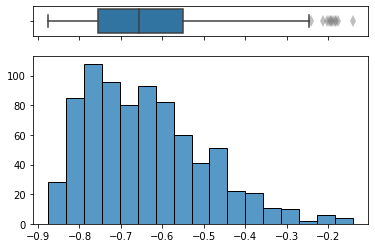

(<AxesSubplot:>, <AxesSubplot:>)

In [10]:
histo_box(validation.score)

# visualize

In [11]:
def show_heatmaps(vmin=None, vmax=None):
    axes = []
    for (marker_set, structcorr), heatmap in unwrap_dictionary(heatmaps):
        g = sns.heatmap(heatmap,
                        vmin=vmin,
                        vmax=vmax,
                        cmap='viridis',
                        cbar_kws={'label': "Kendall's $\\tau$"})

        g.set(title=f'{marker_set} {structcorr}')

        g.figure.axes[-1].yaxis.label.set_size(15)

        plt.show()

        axes.append(g.figure.axes[0])
    
    return axes

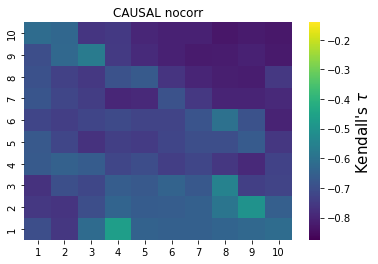

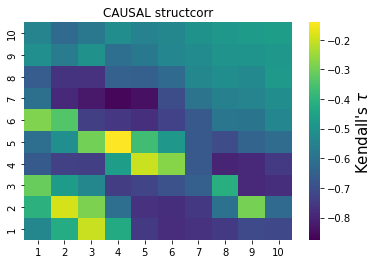

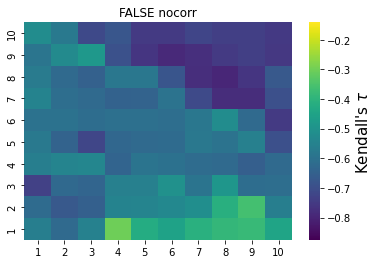

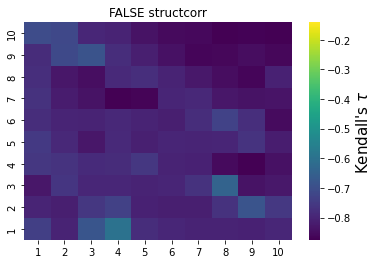

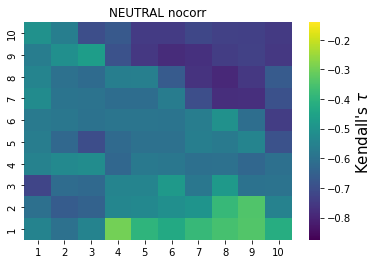

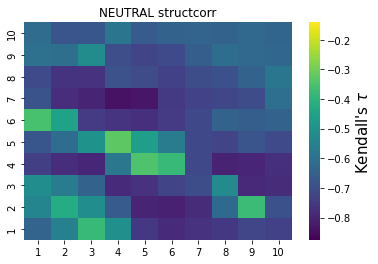

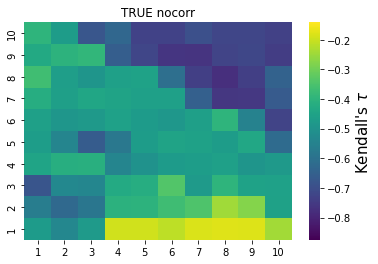

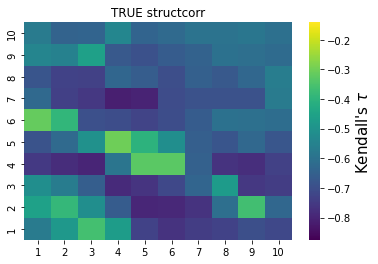

[<AxesSubplot:title={'center':'CAUSAL nocorr'}>,
 <AxesSubplot:title={'center':'CAUSAL structcorr'}>,
 <AxesSubplot:title={'center':'FALSE nocorr'}>,
 <AxesSubplot:title={'center':'FALSE structcorr'}>,
 <AxesSubplot:title={'center':'NEUTRAL nocorr'}>,
 <AxesSubplot:title={'center':'NEUTRAL structcorr'}>,
 <AxesSubplot:title={'center':'TRUE nocorr'}>,
 <AxesSubplot:title={'center':'TRUE structcorr'}>]

In [12]:
show_heatmaps(vmin=vmin, vmax=vmax)

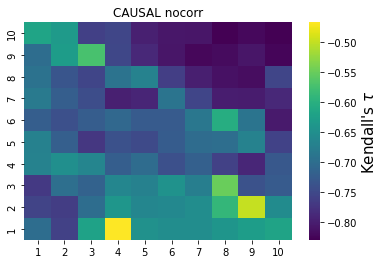

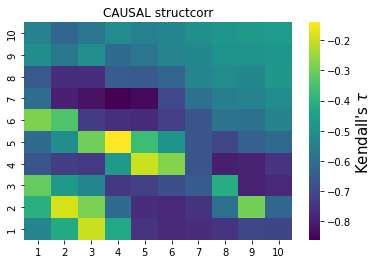

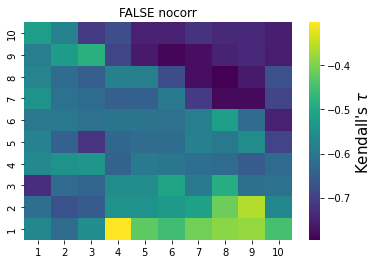

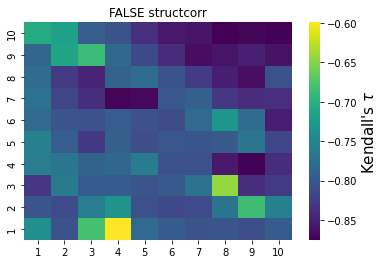

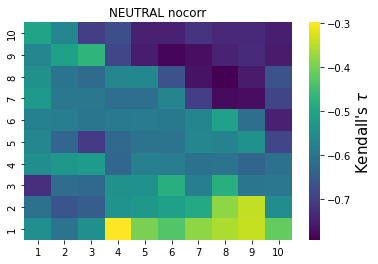

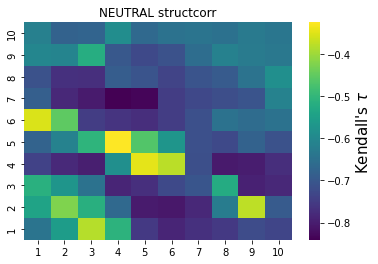

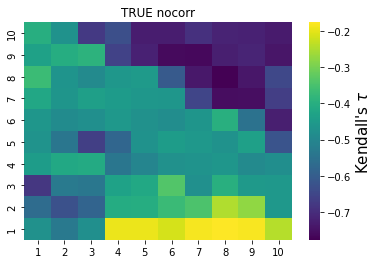

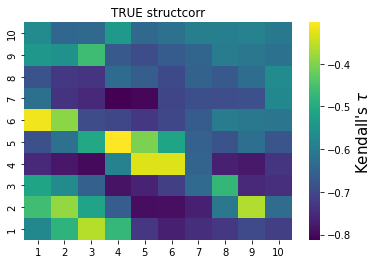

[<AxesSubplot:title={'center':'CAUSAL nocorr'}>,
 <AxesSubplot:title={'center':'CAUSAL structcorr'}>,
 <AxesSubplot:title={'center':'FALSE nocorr'}>,
 <AxesSubplot:title={'center':'FALSE structcorr'}>,
 <AxesSubplot:title={'center':'NEUTRAL nocorr'}>,
 <AxesSubplot:title={'center':'NEUTRAL structcorr'}>,
 <AxesSubplot:title={'center':'TRUE nocorr'}>,
 <AxesSubplot:title={'center':'TRUE structcorr'}>]

In [13]:
show_heatmaps()

In [14]:
mvp.boxplot_kwargs['palette'].update({'rda_outliers' : 'white'})

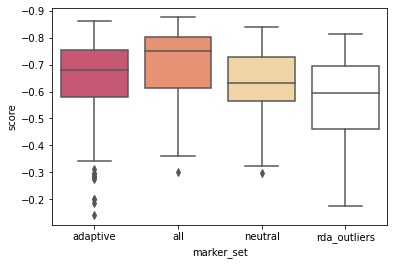

In [15]:
g = sns.boxplot(data=validation,
                x='marker_set',
                y='score',
                palette=mvp.boxplot_kwargs['palette']
               )

g.axes.invert_yaxis()

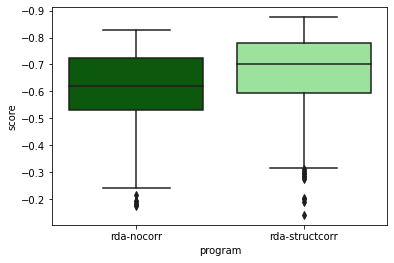

In [16]:
g = sns.boxplot(data=validation,
                x='program',
                y='score',
                palette=mvp.boxplot_kwargs['palette']
               )

g.axes.invert_yaxis()

In [17]:
def make_scatter(m1, m2, validation):
    fig, ax = plt.subplots()
    
    m1_df = validation[validation.marker_set == m1].copy().reset_index(drop=True)
    m2_df = validation[validation.marker_set == m2].copy().reset_index(drop=True)
    
    print(nrow(m1_df), nrow(m2_df))
    
    ax.scatter(m1_df['score'],
               m2_df['score'])

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    ax.set_xlabel(m1)
    ax.set_ylabel(m2)
    
    
    perc = (m1_df.score <= m2_df.score).sum() / nrow(m1_df)
    perc = '{:.0f}'.format(perc*100)
    ax.set_title(f'{perc}% of {m1} scores are ≤ {m2} scores')
    
    ax.invert_yaxis()
    ax.invert_xaxis()
    
    
    plt.show()
    
    pass

### RDA-uncorrected scatterplots

100 100


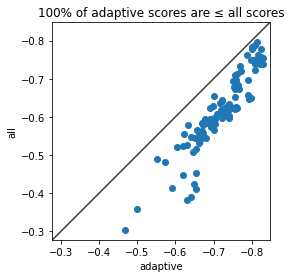

100 100


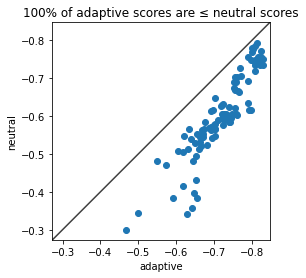

100 100


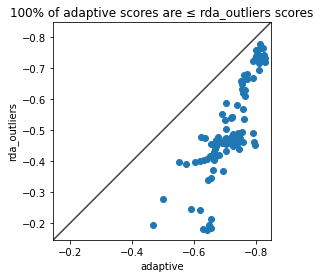

100 100


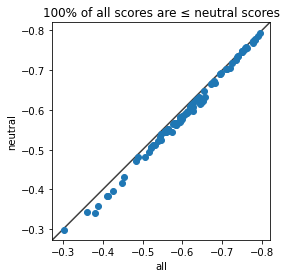

100 100


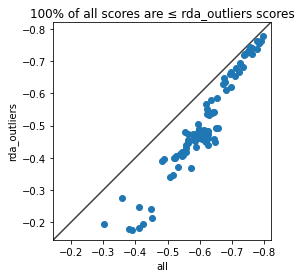

100 100


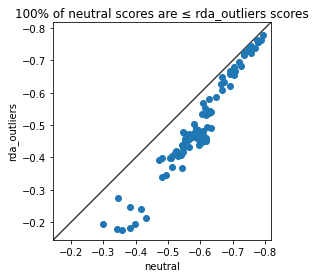

In [18]:
for i, marker_set1 in enumerate(validation.marker_set.unique()):
    for j, marker_set2 in enumerate(validation.marker_set.unique()):
        if i < j:
            make_scatter(marker_set1, marker_set2, validation[validation.program=='rda-nocorr'])

### RDA-corrected scatterplots

100 100


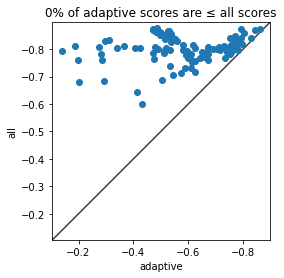

100 100


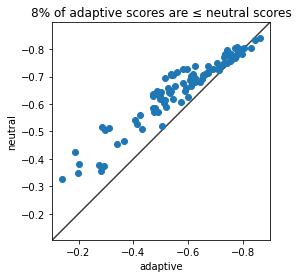

100 100


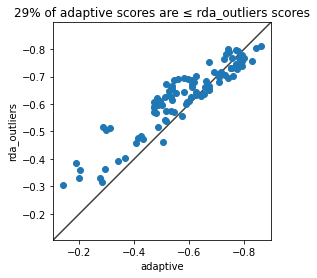

100 100


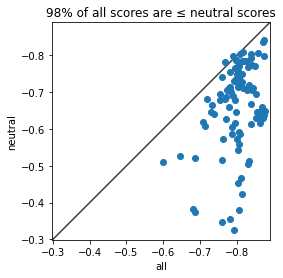

100 100


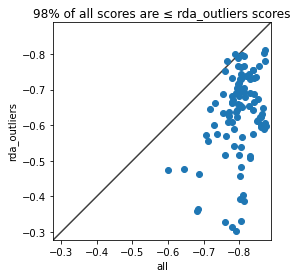

100 100


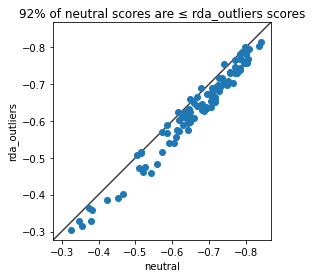

In [19]:
for i, marker_set1 in enumerate(validation.marker_set.unique()):
    for j, marker_set2 in enumerate(validation.marker_set.unique()):
        if i < j:
            make_scatter(marker_set1, marker_set2, validation[validation.program=='rda-structcorr'])

# save

In [20]:
validation_dir


'/home/b.lind/offsets/run_20220919_tutorial/rda/validation'

In [22]:
f = op.join(validation_dir, 'tutorial_validation_scores.txt')

validation.to_csv(f, sep='\t', index=False, header=True)

